In [2]:
import requests
import pandas as pd

# Define your city and time period
latitude = 34.05   # Example: Los Angeles
longitude = -118.25
start_date = "2020-01-01"
end_date = "2022-12-31"

# Open-Meteo API URL
url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min,precipitation_sum"
    f"&timezone=America%2FLos_Angeles"
)

# Make request
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data['daily'])
df['time'] = pd.to_datetime(df['time'])

# Preview
print(df.head())


        time  temperature_2m_max  temperature_2m_min  precipitation_sum
0 2020-01-01                17.5                 6.8                0.0
1 2020-01-02                16.9                 7.1                0.0
2 2020-01-03                20.6                 9.6                0.0
3 2020-01-04                18.7                 9.4                0.0
4 2020-01-05                19.7                 7.5                0.0


how ev sales increased over the years?
and how the increase in ev sales, increased the demand for ev charging stations?
is there any correlation to weather and charging stations usage?
is it really cheaper to use a electric vehicle?
is it really saving our planet?
how is the energy used generated and whats the source of it?
how much emmisions would a gasoline vehicle produce ?

In [3]:
import pandas as pd
energy_usage = pd.read_csv("archive/EVChargingStationUsage.csv", parse_dates=["Start Date"])
ev_sales = pd.read_csv("archive/vehicle_sales.csv")
weather = pd.read_csv("archive/weather_data.csv")

C:\Users\vinso\AppData\Local\Temp\ipykernel_19136\1212982145.py:2: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_usage = pd.read_csv("archive/EVChargingStationUsage.csv", parse_dates=["Start Date"])


In [4]:
weather.rename(columns={"time": "date"}, inplace=True)

In [5]:
print(energy_usage.head())

                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

           Start Date Start Time Zone         End Date End Time Zone  \
0 2011-07-29 20:17:00             PDT  7/29/2011 23:20           PDT   
1 2011-07-30 00:00:00             PDT   7/30/2011 0:02           PDT   
2 2011-07-30 08:16:00             PDT  7/30/2011 12:34           PDT   
3 2011-07-30 14:51:00             PDT  7/30/2011 16:55           PDT   
4 2011-07-30 18:51:00             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


energy_usage['month'] = energy_usage['Start Date'].dt.to_period('M').dt.to_timestamp()

# Step 2: Aggregate total energy used per month
monthly_energy = energy_usage.groupby('month')['Energy (kWh)'].sum().reset_index()

# Check result
print(monthly_energy.head())



       month  Energy (kWh)
0 2011-07-01     72.437273
1 2011-08-01    781.309083
2 2011-09-01   1251.386747
3 2011-10-01   1934.620528
4 2011-11-01   2084.733485


C:\Users\vinso\AppData\Local\Temp\ipykernel_19136\2421132624.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\vinso\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


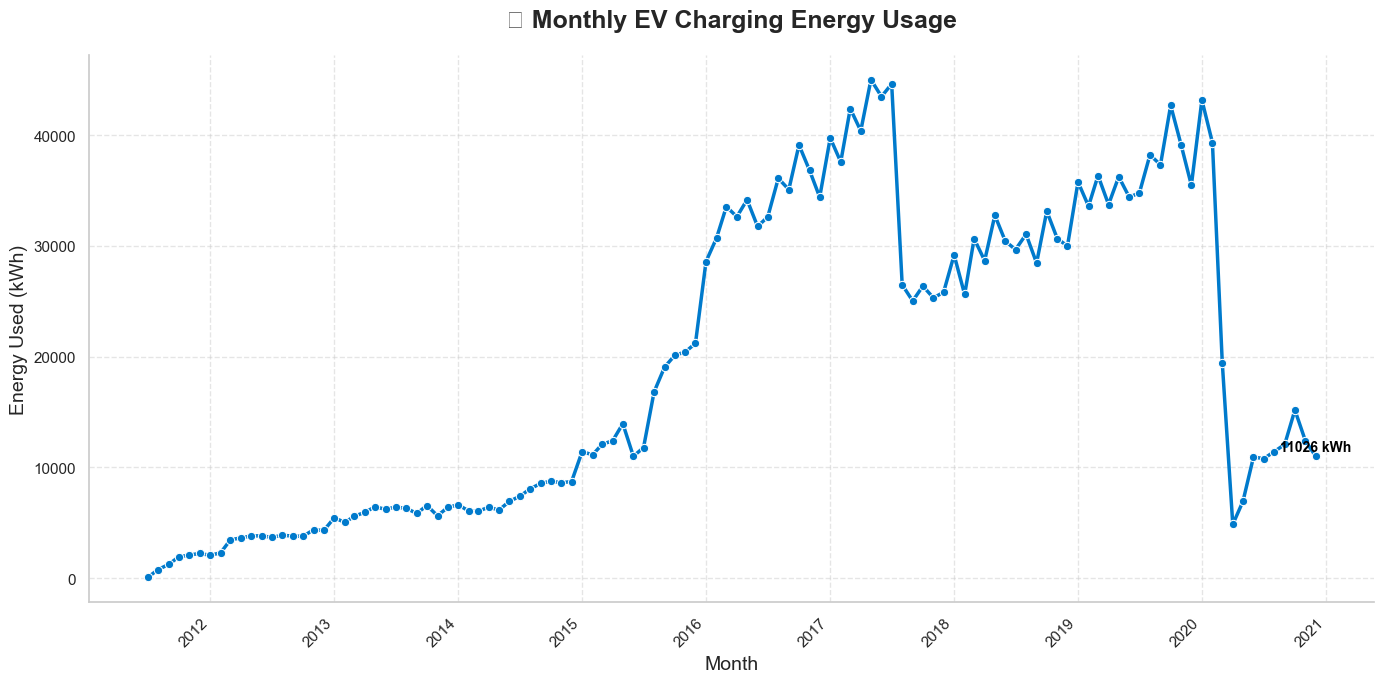

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Load or reuse your monthly_energy DataFrame
# Assume it already contains 'month' and 'energy_kwh'

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='month',
    y='Energy (kWh)',
    data=monthly_energy,
    marker='o',
    linewidth=2.5,
    color='#007acc',  # A nice blue
)

# Annotate the latest data point
last_point = monthly_energy.iloc[-1]
plt.text(
    last_point['month'],
    last_point['Energy (kWh)'] + 200,  # slight vertical offset
    f"{last_point['Energy (kWh)']:.0f} kWh",
    ha='center',
    va='bottom',
    fontsize=10,
    fontweight='bold',
    color='black'
)

# Set titles and labels
plt.title('📊 Monthly EV Charging Energy Usage', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Used (kWh)', fontsize=14)

# Format x-axis for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show grid, remove spines for clean look
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [8]:
print(ev_sales.head())

   Data Year  Quarter         COUNTY FUEL_TYPE   MAKE     MODEL  \
0       2008        3        Alameda  Electric  Tesla  Roadster   
1       2008        3  San Francisco  Electric  Tesla  Roadster   
2       2008        3      San Mateo  Electric  Tesla  Roadster   
3       2008        3    Santa Clara  Electric  Tesla  Roadster   
4       2008        3         Sonoma  Electric  Tesla  Roadster   

   Number of Vehicles  
0                   1  
1                   1  
2                   3  
3                   4  
4                   1  


In [9]:
import pandas as pd

# Assume your DataFrame is named ev_sales
# Convert year and quarter to a datetime (quarter start date)
ev_sales['quarter_start'] = pd.to_datetime(ev_sales['Data Year'].astype(str)) + pd.to_timedelta((ev_sales['Quarter'] - 1) * 3, unit='m')


In [10]:
# Group by quarter and make, sum vehicle counts
quarterly_sales = ev_sales.groupby(['quarter_start', 'MAKE'])['Number of Vehicles'].sum().reset_index()


In [11]:
# Sum total vehicles per make
make_totals = ev_sales.groupby('MAKE')['Number of Vehicles'].sum()

# Get top 5 makes
top_5_makes = make_totals.sort_values(ascending=False).head(5).index.tolist()

# Create a new column with 'Others' for non-top-5
ev_sales['MAKE_GROUPED'] = ev_sales['MAKE'].apply(lambda x: x if x in top_5_makes else 'Others')


In [12]:
# Group by quarter and new grouped make label
quarterly_sales_grouped = (
    ev_sales.groupby(['quarter_start', 'MAKE_GROUPED'])['Number of Vehicles']
    .sum()
    .reset_index()
)


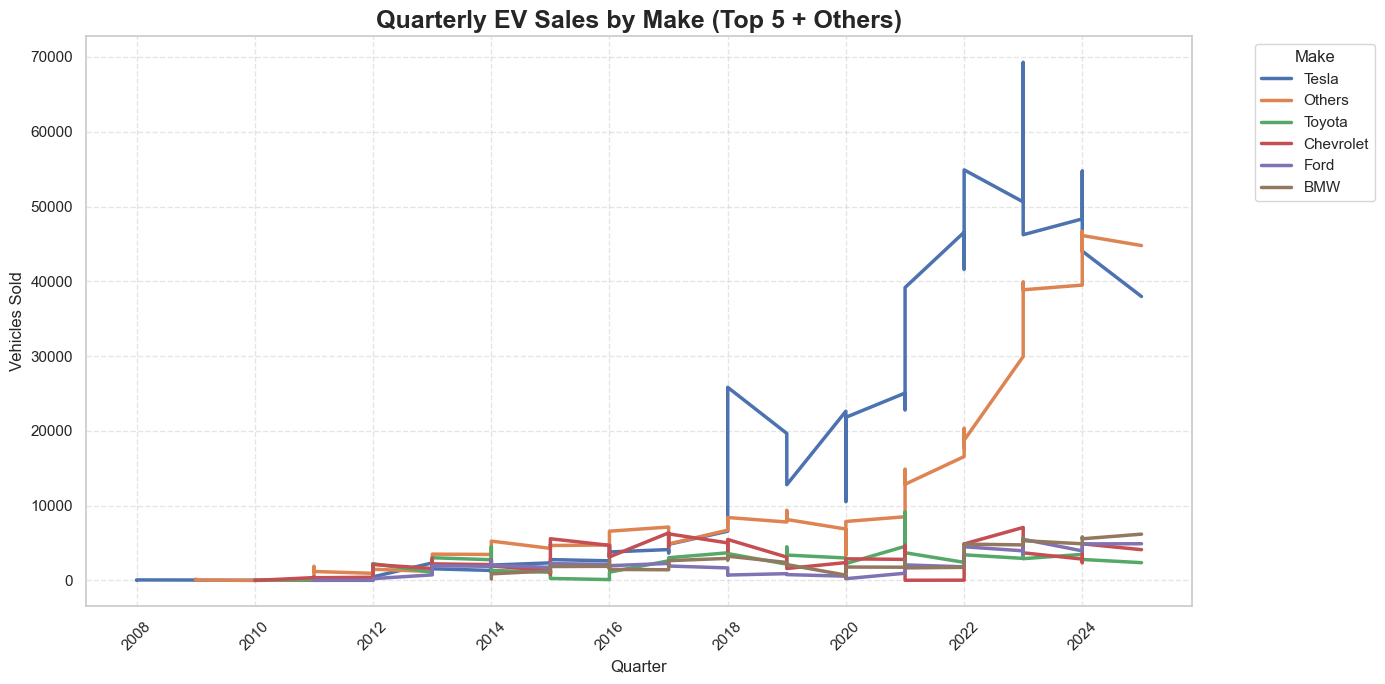

In [13]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=quarterly_sales_grouped,
    x='quarter_start',
    y='Number of Vehicles',
    hue='MAKE_GROUPED',
    linewidth=2.5  # No marker
)

plt.title('Quarterly EV Sales by Make (Top 5 + Others)', fontsize=18, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Vehicles Sold')
plt.xticks(rotation=45)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\vinso\AppData\Local\Temp\ipykernel_19136\4006311494.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\vinso\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


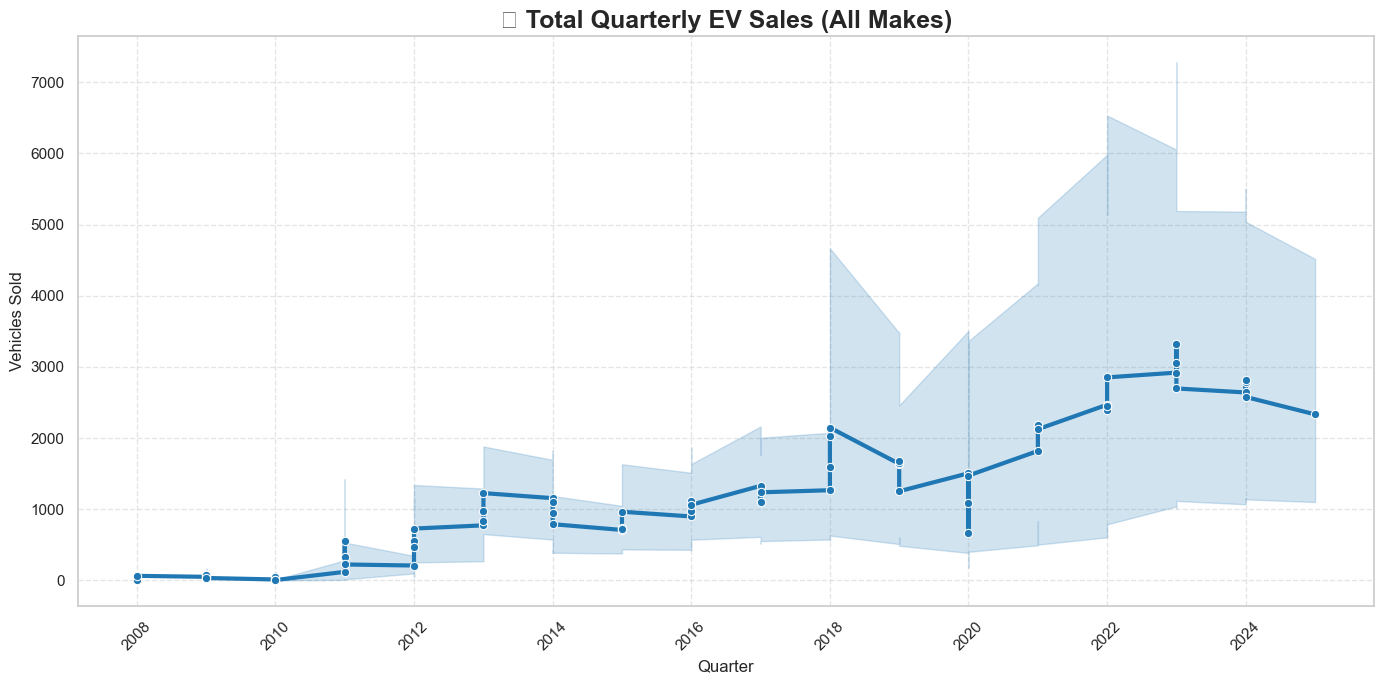

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=quarterly_sales,
    x='quarter_start',
    y='Number of Vehicles',
    color='#1f77b4',
    linewidth=3,
    marker='o'
)

# Format
plt.title('📈 Total Quarterly EV Sales (All Makes)', fontsize=18, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Vehicles Sold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Number of charging stations

In [16]:
station_counts = energy_usage['Station Name'].nunique()
print(station_counts)

47


In [ ]:
df['estimated_gas_cost'] = df['Gasoline Savings (gallons)'] * avg_gas_price_per_gallon
df['savings_vs_gas'] = df['estimated_gas_cost'] - df['Fee']


In [19]:
charge_loc = energy_usage.dropna(subset=['Latitude','Longitude'])
unique_stations = charge_loc.drop_duplicates(subset=['Station Name', 'Latitude', 'Longitude'])

In [21]:
import folium
from folium.plugins import MarkerCluster
# Create map centered around average lat/lon
map_center = [unique_stations['Latitude'].mean(), unique_stations['Longitude'].mean()]
ev_map = folium.Map(location=map_center, zoom_start=9)

# Add marker cluster for better performance
marker_cluster = MarkerCluster().add_to(ev_map)

# Add charging station markers
for _, row in unique_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"<b>Station:</b> {row['Station Name']}<br><b>City:</b> {row['City']}", max_width=300),
        icon=folium.Icon(color='green', icon='bolt', prefix='fa')
    ).add_to(marker_cluster)

# Save map to HTML (optional)
ev_map.save("charging_station_map.html")

# To display in Jupyter Notebook
ev_map

In [23]:
# Ensure datetime format
energy_usage['Start Date'] = pd.to_datetime(energy_usage['Start Date'], errors='coerce')

# Extract year
energy_usage['year'] = energy_usage['Start Date'].dt.year

# Filter for selected years
selected_years = [2011, 2015, 2020]
energy_usage_selected = energy_usage[energy_usage['year'].isin(selected_years)].copy()


In [24]:
# Yearly average gas prices (USD per gallon)
yearly_gas_prices = {
    2011: 2.78,
    2015: 2.15,
    2020: 2.17
}

# Map gas price per session
energy_usage_selected['gas_price'] = energy_usage_selected['year'].map(yearly_gas_prices)

# Clean columns
energy_usage_selected['Fee'] = pd.to_numeric(energy_usage_selected['Fee'], errors='coerce').fillna(0)
energy_usage_selected['Gasoline Savings (gallons)'] = pd.to_numeric(
    energy_usage_selected['Gasoline Savings (gallons)'], errors='coerce').fillna(0)

# Estimate gasoline cost and savings
energy_usage_selected['estimated_gas_cost'] = (
    energy_usage_selected['Gasoline Savings (gallons)'] * energy_usage_selected['gas_price']
)

energy_usage_selected['savings_vs_gas'] = (
    energy_usage_selected['estimated_gas_cost'] - energy_usage_selected['Fee']
)


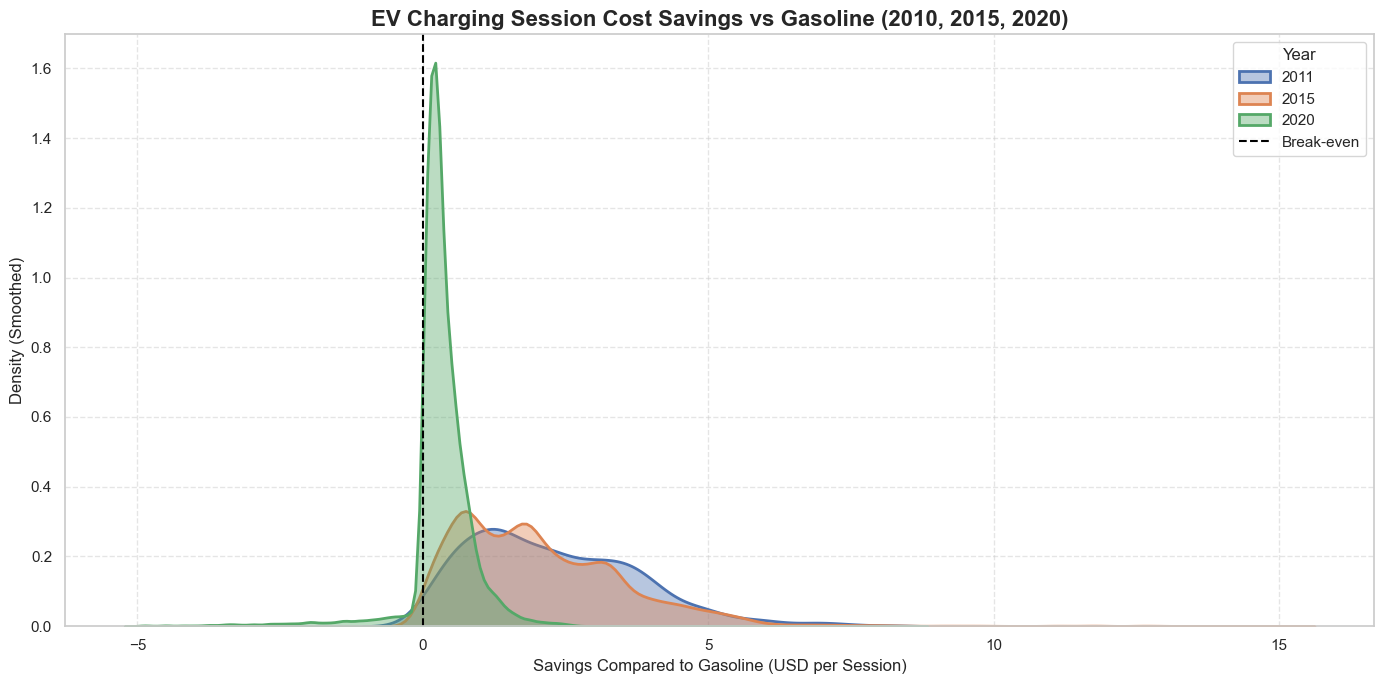

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Trim to focus on meaningful range
filtered = energy_usage_selected[(energy_usage_selected['savings_vs_gas'] > -5) & 
                                 (energy_usage_selected['savings_vs_gas'] < 15)]

# Plot KDEs for each year with smoothing
for year in selected_years:
    sns.kdeplot(
        data=filtered[filtered['year'] == year],
        x='savings_vs_gas',
        label=f"{year}",
        fill=True,
        alpha=0.4,
        linewidth=2
    )

plt.axvline(0, color='black', linestyle='--', label='Break-even')

plt.title('EV Charging Session Cost Savings vs Gasoline (2010, 2015, 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Savings Compared to Gasoline (USD per Session)', fontsize=12)
plt.ylabel('Density (Smoothed)', fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [26]:
for year in selected_years:
    total = energy_usage_selected[energy_usage_selected['year'] == year].shape[0]
    cheaper = energy_usage_selected[
        (energy_usage_selected['year'] == year) & (energy_usage_selected['savings_vs_gas'] > 0)
    ].shape[0]
    pct = (cheaper / total) * 100 if total > 0 else 0
    print(f"🗓️ {year}: {pct:.2f}% of sessions were cheaper than gasoline.")


🗓️ 2011: 100.00% of sessions were cheaper than gasoline.
🗓️ 2015: 100.00% of sessions were cheaper than gasoline.
🗓️ 2020: 93.65% of sessions were cheaper than gasoline.


In [28]:
summary_stats = (
    energy_usage_selected
    .groupby('year')['savings_vs_gas']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .round(2)
    .rename(columns={
        'count': 'Sessions',
        'mean': 'Avg Savings (USD)',
        'median': 'Median Savings (USD)',
        'min': 'Min Savings',
        'max': 'Max Savings'
    })
)

print("💡 Summary of EV Charging Cost Savings vs Gasoline:")
display(summary_stats)


💡 Summary of EV Charging Cost Savings vs Gasoline:


,Sessions,Avg Savings (USD),Median Savings (USD),Min Savings,Max Savings
year,,,,,
2011,1275,2.29,2.10,0.01,8.31
2015,23111,2.12,1.80,0.00,21.39
2020,20097,0.21,0.27,-42.23,8.59


In [29]:
# Convert to numeric
energy_usage['GHG Savings (kg)'] = pd.to_numeric(energy_usage['GHG Savings (kg)'], errors='coerce').fillna(0)

In [30]:
ghg_summary = (
    energy_usage.groupby('year')['GHG Savings (kg)']
    .agg(['sum', 'mean', 'count'])
    .round(2)
    .rename(columns={
        'sum': 'Total GHG Savings (kg)',
        'mean': 'Avg GHG Savings per Session (kg)',
        'count': 'Sessions'
    })
)

print("🌱 Yearly Greenhouse Gas Emissions Saved by EV Charging:")
display(ghg_summary)


🌱 Yearly Greenhouse Gas Emissions Saved by EV Charging:


,Total GHG Savings (kg),Avg GHG Savings per Session (kg),Sessions
year,,,
2011,3514.60,2.76,1275
2012,18049.14,2.73,6601
2013,30198.59,2.99,10109
2014,37123.40,3.17,11722
2015,76215.43,3.30,23111
2016,170339.04,3.63,46943
2017,177347.22,3.62,49022
2018,151313.67,3.54,42803
2019,183832.32,3.85,47732


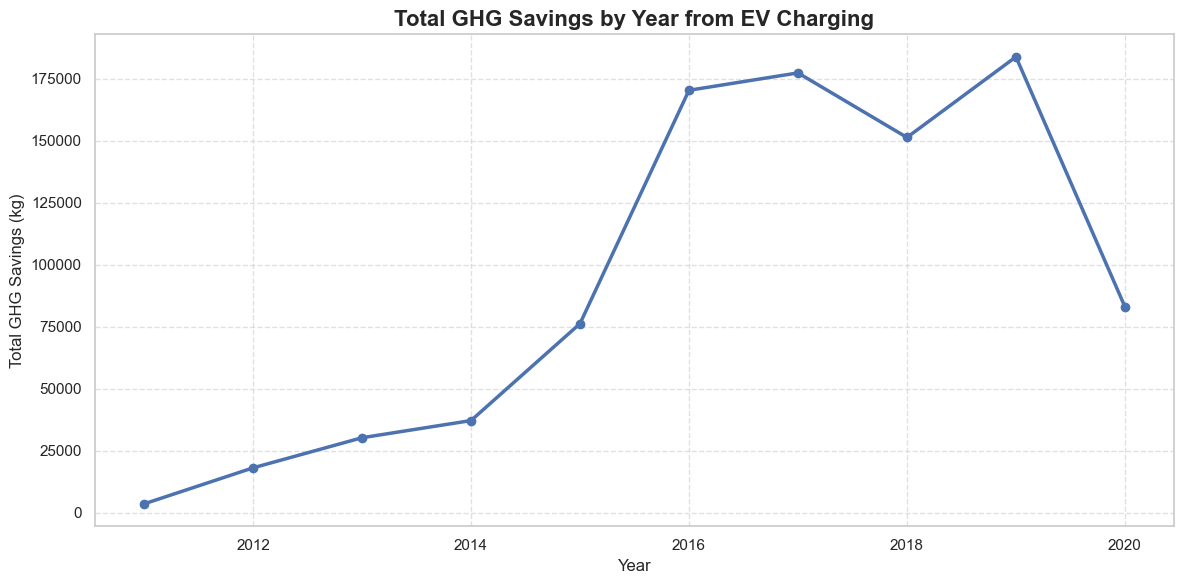

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ghg_summary.index, ghg_summary['Total GHG Savings (kg)'], marker='o', linewidth=2.5)
plt.title('Total GHG Savings by Year from EV Charging', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total GHG Savings (kg)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [32]:
# Clean GHG and gasoline columns
energy_usage['GHG Savings (kg)'] = pd.to_numeric(energy_usage['GHG Savings (kg)'], errors='coerce').fillna(0)
energy_usage['Gasoline Savings (gallons)'] = pd.to_numeric(energy_usage['Gasoline Savings (gallons)'], errors='coerce').fillna(0)

# Total GHG and fuel savings
total_ghg_kg = energy_usage['GHG Savings (kg)'].sum()
total_gallons = energy_usage['Gasoline Savings (gallons)'].sum()

# Real-world equivalents
trees_planted = total_ghg_kg / 21.77  # 1 tree absorbs ~21.77 kg CO₂/year
miles_driven_offset = total_gallons * 24.2  # avg 24.2 mpg in U.S.

print(f"🌍 Total GHG Saved: {total_ghg_kg:,.0f} kg")
print(f"⛽ Total Gasoline Offset: {total_gallons:,.0f} gallons")
print(f"🌳 Equivalent to planting ~{trees_planted:,.0f} trees")
print(f"🚗 Equivalent to offsetting ~{miles_driven_offset:,.0f} miles driven")


🌍 Total GHG Saved: 930,936 kg
⛽ Total Gasoline Offset: 278,172 gallons
🌳 Equivalent to planting ~42,762 trees
🚗 Equivalent to offsetting ~6,731,769 miles driven


🔌 Step 2: How Clean Is the Energy Used for EV Charging?
🔍 Reality:
Electricity used for charging depends on the local energy mix. In the U.S., for example:

States like California use ~60%+ clean energy (solar, wind, hydro).

Others still rely on coal or natural gas.

So EV charging isn’t always 100% clean — but still cleaner than gasoline in nearly all U.S. states.

🧠 Why EVs Are Still Better (Even If Energy Isn’t Fully Clean):
Factor	EVs (on grid power)	Gasoline Vehicles
Efficiency	80–90% motor efficiency	20–30% engine efficiency
Emissions at use	0 (no tailpipe)	High (CO₂, NOx, PM2.5)
Energy source control	Can shift to solar/wind over time	Always fossil fuel
Grid efficiency gains	Improves with technology + storage	No tech advancement in fuel combustion

Step 3: How Much Impact Is It Really?
Let’s say your dataset has:

💨 500,000 kg of CO₂ saved
This equals:

🌳 22,955 trees planted

🚗 2.9 million gasoline miles offset

🏙️ Significant public health improvements in urban areas (air quality, noise)

In the grand scheme, it means:

A single fleet or city can make a measurable dent in emissions

The real power comes when scaled + powered by renewables



What This Means for Your Report or Dashboard:
You can include a page/section titled:

“Environmental Impact of EV Charging”

With:

Total emissions saved

Visuals of savings over time

Tree + mile equivalents

Clean energy argument



In [35]:
print(monthly_energy)

         month  Energy (kWh)
0   2011-07-01     72.437273
1   2011-08-01    781.309083
2   2011-09-01   1251.386747
3   2011-10-01   1934.620528
4   2011-11-01   2084.733485
..         ...           ...
109 2020-08-01  11426.838000
110 2020-09-01  12079.008000
111 2020-10-01  15185.087000
112 2020-11-01  12398.792000
113 2020-12-01  11026.273000

[114 rows x 2 columns]


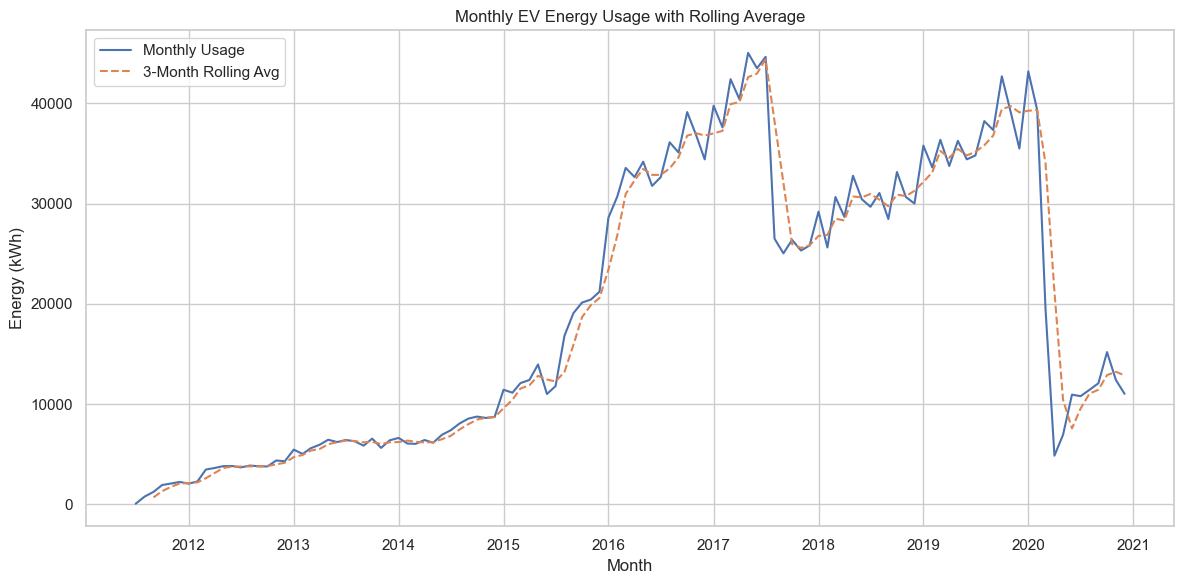

In [37]:
monthly_energy['rolling_avg'] = monthly_energy['Energy (kWh)'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_energy['month'], monthly_energy['Energy (kWh)'], label='Monthly Usage')
plt.plot(monthly_energy['month'], monthly_energy['rolling_avg'], label='3-Month Rolling Avg', linestyle='--')
plt.title('Monthly EV Energy Usage with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Convert date column to datetime
weather['date'] = pd.to_datetime(weather['date'])

# Create 'month' column (first day of the month)
weather['month'] = weather['date'].dt.to_period('M').dt.to_timestamp()


In [43]:
print(weather.head())

        date  temperature_2m_max  temperature_2m_min  precipitation_sum  \
0 2020-01-01                17.5                 6.8                0.0   
1 2020-01-02                16.9                 7.1                0.0   
2 2020-01-03                20.6                 9.6                0.0   
3 2020-01-04                18.7                 9.4                0.0   
4 2020-01-05                19.7                 7.5                0.0   

       month  
0 2020-01-01  
1 2020-01-01  
2 2020-01-01  
3 2020-01-01  
4 2020-01-01  


In [63]:
# Aggregate: average temperature and total precipitation per month
weather_monthly = weather.groupby('month').agg({
    'temperature_2m_min': 'mean',
    'temperature_2m_max': 'mean',
    'precipitation_sum': 'sum'
}).reset_index()

print(weather_monthly.head())


       month  temperature_2m_min  temperature_2m_max  precipitation_sum
0 2020-01-01            7.380645           18.912903                7.9
1 2020-02-01            8.920690           21.741379                6.7
2 2020-03-01            9.306452           18.477419              140.8
3 2020-04-01           11.680000           22.640000               93.8
4 2020-05-01           14.067742           27.200000                5.3


In [64]:
import pandas as pd

# Ensure 'month' is in datetime format
monthly_energy['month'] = pd.to_datetime(monthly_energy['month'])
weather_monthly['month'] = pd.to_datetime(weather_monthly['month'])

# Merge both DataFrames
energy_weather = pd.merge(
    monthly_energy,
    weather_monthly,
    on='month',
    how='inner'  # use 'left' if energy is the main source and some weather values may be missing
)

print(energy_weather.head())



       month  Energy (kWh)   rolling_avg  temperature_2m_min  \
0 2020-01-01     43172.791  39248.421667            7.380645   
1 2020-02-01     39321.822  39323.616000            8.920690   
2 2020-03-01     19470.564  33988.392333            9.306452   
3 2020-04-01      4860.954  21217.780000           11.680000   
4 2020-05-01      6942.764  10424.760667           14.067742   

   temperature_2m_max  precipitation_sum  
0           18.912903                7.9  
1           21.741379                6.7  
2           18.477419              140.8  
3           22.640000               93.8  
4           27.200000                5.3  


c:\Users\vinso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vinso\AppData\Local\Temp\ipykernel_19136\2705035384.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


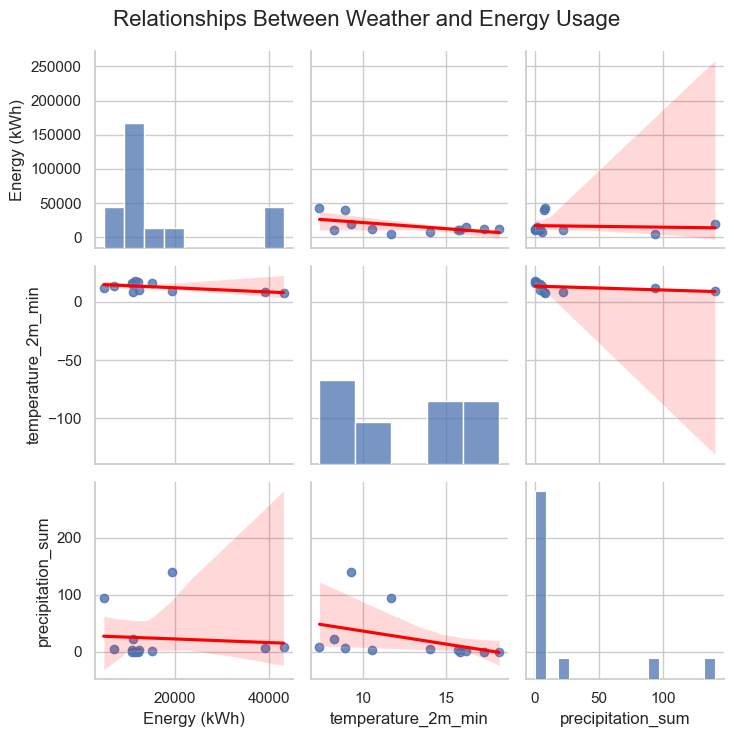

In [65]:
sns.pairplot(
    energy_weather[['Energy (kWh)', 'temperature_2m_min', 'precipitation_sum']],
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}}
)
plt.suptitle("Relationships Between Weather and Energy Usage", fontsize=16)
plt.tight_layout()
plt.show()


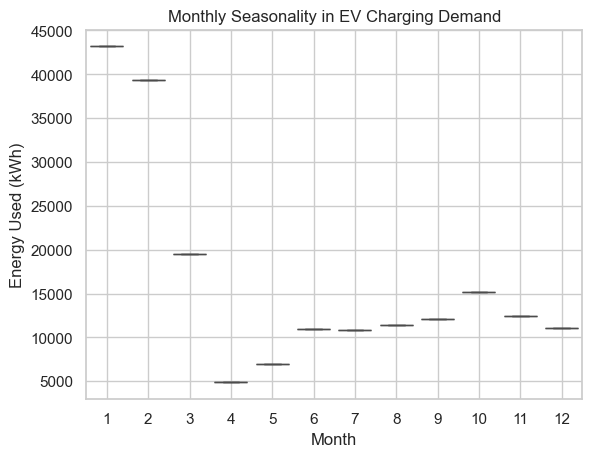

In [66]:
energy_weather['month_num'] = pd.to_datetime(energy_weather['month']).dt.month
sns.boxplot(x='month_num', y='Energy (kWh)', data=energy_weather)
plt.title('Monthly Seasonality in EV Charging Demand')
plt.xlabel('Month')
plt.ylabel('Energy Used (kWh)')
plt.grid(True)
plt.show()


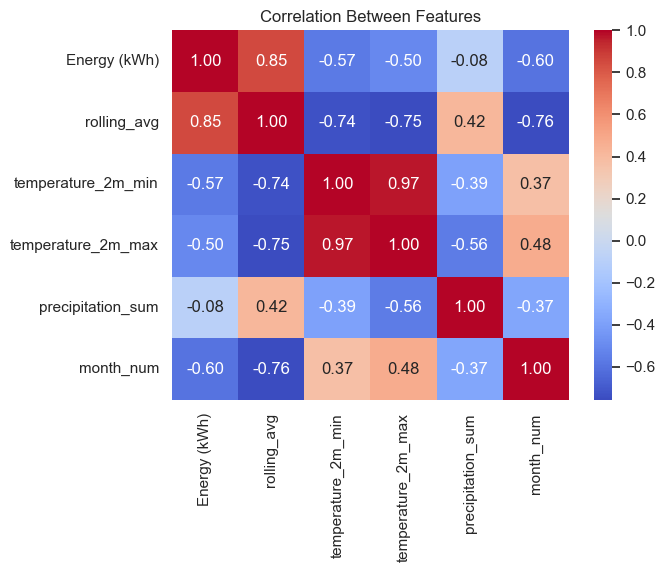

In [67]:
sns.heatmap(energy_weather.drop(columns=['month']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()
